In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read_csv converts to DataFrame
applied = pd.read_csv('../Data/assylum/assylum_applications_raw.csv')
accepted = pd.read_csv('../Data/assylum/assylum_applications_accepted_raw.csv')

In [56]:
applied.rename(columns={'OBS_VALUE': 'count_applied'}, errors='raise', inplace = True)
accepted.rename(columns={'OBS_VALUE' : 'count_accepted'}, inplace = True)

In [57]:
print(len(applied), len(accepted))
# applied is longer by one row, so we need to merge both dataframes
joined = pd.merge(applied, accepted, on = ['TIME_PERIOD', 'geo',], how = 'inner')

# we only need a few of the columns:
assylum_table = pd.DataFrame({'count_applied' : joined['count_applied'], 
                              'count_accepted' : joined['count_accepted'],
                              'country': joined['geo'], 
                              'year': joined['TIME_PERIOD'] })


398 397


Countries to choose from: Index(['EU-27', 'Germany', 'France', 'Italy', 'Spain', 'Greece', 'Sweden',
       'Austria', 'Belgium', 'Netherlands', 'Hungary', 'Switzerland',
       'United Kingdom', 'Bulgaria', 'Poland', 'Cyprus', 'Norway', 'Finland',
       'Denmark', 'Ireland', 'Romania', 'Slovenia', 'Luxembourg', 'Malta',
       'Portugal', 'Croatia', 'Czechia', 'Iceland', 'Estonia', 'Lithuania',
       'Montenegro', 'Latvia', 'Slovakia', 'Liechtenstein'],
      dtype='object', name='country')


,count_applied,count_accepted,year
country,,,
EU-27,8717385,262465,22198
Germany,3281775,121380,24222
France,1374205,82375,24222
Italy,989580,6320,24222
Spain,849430,295,24222
Greece,529055,7330,24222
Sweden,504455,10485,24222
Austria,478265,30640,24222
Belgium,328105,5090,24222


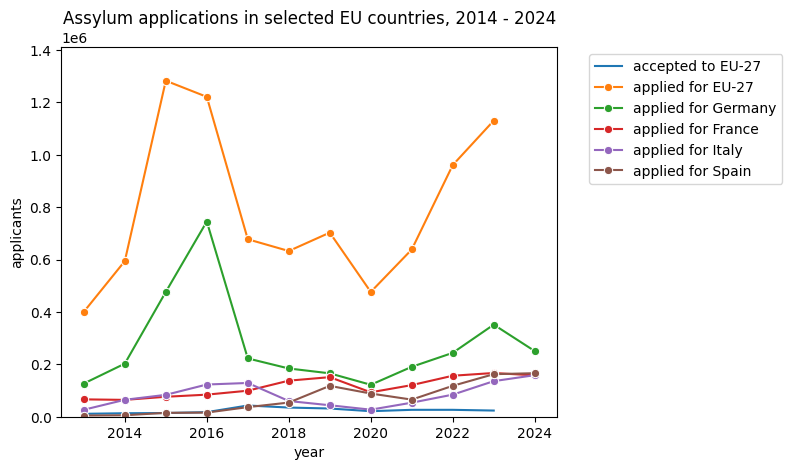

In [58]:
# display(assylum_table)
# display(accepted)
# display(applied)
assylum_table.replace('European Union - 27 countries (from 2020)', 'EU-27', inplace = True)

def draw_asyllum(name, applied = True, accepted=False):
    a_country = assylum_table.query("country == @name").set_index('year')

    if applied:
        a = sns.lineplot(data = a_country, x = 'year', y = 'count_applied', label = f'applied for {name}', marker= 'o')
    if accepted:
        a = sns.lineplot(data = a_country, x = 'year', y = 'count_accepted', label = f'accepted to {name}')

    a.set_title(f'Assylum applications in selected EU countries, 2014 - 2024')
    if applied:
        upper_y = 1.1 * assylum_table['count_applied'].max()
    else:
        upper_y = 1.1 * assylum_table['count_accepted'].max()

    a.set_ylim(ymin= 0, ymax = upper_y )
    a.set_ylabel('applicants')
    a.legend(bbox_to_anchor=(1.05, 1), loc=2)



# Plot the top 5 countries with the most applications:
top = assylum_table.groupby(by = 'country').sum().sort_values(by = 'count_applied', ascending=False)
top.rename(index = {'European Union - 27 countries (from 2020)' : 'EU-27'}, inplace = True)
print('Countries to choose from:', top.index)
display(top)
g = draw_asyllum(top.index[0], applied = False, accepted=True)
for country in top.index[0:5]:
    g = draw_asyllum(country)

Average acceptance rate: 0.030108226262807024


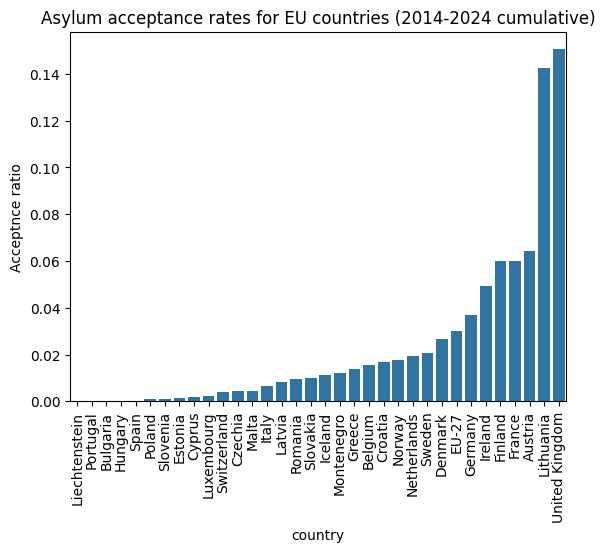

In [59]:

# which country is the most generous? not so easy to tell...
# -> compute ratios of acceptance for each country and plot as bar plot
top['a_ratio'] = top['count_accepted'] / top['count_applied']

top.sort_values(by = 'a_ratio', inplace = True)

a = sns.barplot(data = top, x = 'country', y = 'a_ratio')
a.set_ylabel('Acceptnce ratio')
a.set_title('Asylum acceptance rates for EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)
print('Average acceptance rate:', top.loc['EU-27', 'a_ratio'])

In [60]:
populations = pd.read_csv('../Data/population.csv')
populations.replace('European Union - 27 countries (from 2020)','EU-27', inplace= True)
pop_2020 = populations.query("TIME_PERIOD == 2020")
selected_countries = set(top.index) 
total_pop = pop_2020.query("geo in @selected_countries")

# display(pop_2020)
# display(total_pop)
# checking if no country is missing:
k = set(total_pop['geo'])
print(selected_countries - k,  k - selected_countries)    
print(len(total_pop), len(top))

total_pop.sort_values('geo', ascending=True, inplace = True)
top.sort_index(ascending=True, inplace=True)

# finally add column to "top" dataframe  # to_numpy creates a clean array without index.
top['population'] = total_pop['OBS_VALUE'].to_numpy()
top.drop(columns = 'year', inplace = True)
display(top)

set() set()
34 34


C:\Users\adize\AppData\Local\Temp\ipykernel_30860\215254909.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_pop.sort_values('geo', ascending=True, inplace = True)


,count_applied,count_accepted,a_ratio,population
country,,,,
Austria,478265,30640,0.064065,8901064
Belgium,328105,5090,0.015513,11522440
Bulgaria,136100,35,0.000257,6569275
Croatia,16890,285,0.016874,3933511
Cyprus,98670,200,0.002027,888005
Czechia,16890,75,0.004440,10693939
Denmark,71310,1905,0.026714,5822763
EU-27,8717385,262465,0.030108,447015600
Estonia,9460,15,0.001586,1328976


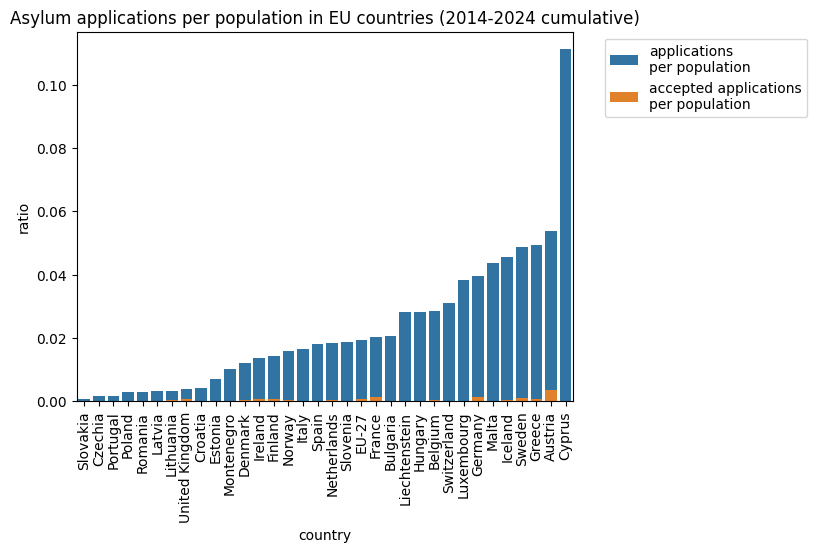

In [61]:
# just a simple bar plot:
top['app_ratio'] = top['count_applied'] / top['population']
top['acc_ratio'] = top['count_accepted'] / top['population']
top.sort_values(by = 'app_ratio', inplace = True)
p = sns.barplot(data = top, x = 'country', y = 'app_ratio', label = 'applications\nper population')
p = sns.barplot(data = top, x = 'country', y = 'acc_ratio', label = 'accepted applications\nper population')
p.set_ylabel('ratio')
p.set_title('Asylum applications per population in EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)
p.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass

Slovakia is the least "desirable" country to end up in lol.

In [62]:
# Hypothesis: countries with more immigrants are more welcoming to 
# foreigners and therefore have a higher asylum acceptance rate.
url = "../Data/Annual_population_eurostat(mandatory).csv"
all_population = pd.read_csv(url)
print(set(all_population['citizen']))

# explanation for column names:
# NAT = Reporting country (national citizens) 
# FOR = foreign countries
# STLS = stateless
# NEY28_FOR = Other non-EU countries (other non-EU citizens)
# EU28_FOR = Other EU countries (other EU citizens)
# UNK = unknown.

display(all_population)


{'STLS', 'TOTAL', 'UNK', 'NEU28_FOR', 'EU28_FOR', 'NAT'}


,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Austria,AUT,EU28_FOR,F,288028.0,310759.0,329981.0,348012.0,365125.0,383295.0,NaN,NaN,NaN,NaN
1,Belgium,BEL,EU28_FOR,F,416232.0,428008.0,434889.0,440355.0,448655.0,457258.0,NaN,NaN,NaN,NaN
2,Switzerland,CHE,EU28_FOR,F,594052.0,610566.0,622893.0,630371.0,637330.0,645916.0,NaN,NaN,NaN,NaN
3,Cyprus,CYP,EU28_FOR,F,55730.0,57716.0,57673.0,59787.0,63044.0,62935.0,NaN,NaN,NaN,NaN
4,Czechia,CZE,EU28_FOR,F,72465.0,76736.0,81670.0,86132.0,91296.0,96186.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Romania,ROU,UNK,T,28.0,48.0,65.0,61.0,177.0,303.0,77.0,NaN,1.0,1250.0
572,Sweden,SWE,UNK,T,8220.0,9601.0,10784.0,11497.0,12122.0,12806.0,13069.0,12633.0,11051.0,9756.0
573,Slovenia,SVN,UNK,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,Slovakia,SVK,UNK,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2924.0,2905.0,2999.0


In [63]:
outside_EU_foreign = all_population.query("citizen == 'NEU28_FOR' and sex == 'T'").loc[:, ['2020', 'Country']]
outside_EU_foreign.set_index('Country', inplace = True)
print(selected_countries - set(outside_EU_foreign.index))
print(set(outside_EU_foreign.index) - selected_countries)
display(outside_EU_foreign)

{'EU-27', 'Montenegro', 'United Kingdom', 'Greece', 'Bulgaria'}
{'Turkey'}


,2020
Country,
Austria,700601.0
Belgium,496596.0
Switzerland,742749.0
Cyprus,42204.0
Czechia,341646.0
Germany,5932244.0
Denmark,298005.0
Estonia,178791.0
Spain,3344102.0


In [64]:
# I will add data manually:
completing = pd.DataFrame([{'EU-27' : 29000000,
                          'United Kingdom':  10388000,
                          'Bulgaria' : 200000,
                          'Montenegro': 122744,
                          'Greece' : 1340456,
                          'Norway' : 931000}]).melt().rename(columns = {'variable':'Country', 'value': '2020'}).set_index('Country')

outside_EU_foreign.drop(['Norway', 'Turkey'], inplace = True)

display(completing)

outside_EU_foreign = pd.concat([outside_EU_foreign, completing], axis = 0)

display(outside_EU_foreign)


print(len(top))
print(len(outside_EU_foreign))

,2020
Country,
EU-27,29000000
United Kingdom,10388000
Bulgaria,200000
Montenegro,122744
Greece,1340456
Norway,931000


,2020
Country,
Austria,700601.0
Belgium,496596.0
Switzerland,742749.0
Cyprus,42204.0
Czechia,341646.0
Germany,5932244.0
Denmark,298005.0
Estonia,178791.0
Spain,3344102.0


34
34


In [65]:
print(set(top.index) == set(outside_EU_foreign.index))
outside_EU_foreign.rename_axis('country', inplace = True)
top = pd.merge(left = outside_EU_foreign, right = top, on = 'country')
top['outside_EU_immigrants'] = outside_EU_foreign['2020']
display(top)
pass

True


,2020,count_applied,count_accepted,a_ratio,population,app_ratio,acc_ratio,outside_EU_immigrants
country,,,,,,,,
Austria,700601.0,478265,30640,0.064065,8901064,0.053731,0.003442,700601.0
Belgium,496596.0,328105,5090,0.015513,11522440,0.028475,0.000442,496596.0
Switzerland,742749.0,266825,1115,0.004179,8606033,0.031004,0.000130,742749.0
Cyprus,42204.0,98670,200,0.002027,888005,0.111114,0.000225,42204.0
Czechia,341646.0,16890,75,0.004440,10693939,0.001579,0.000007,341646.0
Germany,5932244.0,3281775,121380,0.036986,83166711,0.039460,0.001459,5932244.0
Denmark,298005.0,71310,1905,0.026714,5822763,0.012247,0.000327,298005.0
Estonia,178791.0,9460,15,0.001586,1328976,0.007118,0.000011,178791.0
Spain,3344102.0,849430,295,0.000347,47318050,0.017952,0.000006,3344102.0


34


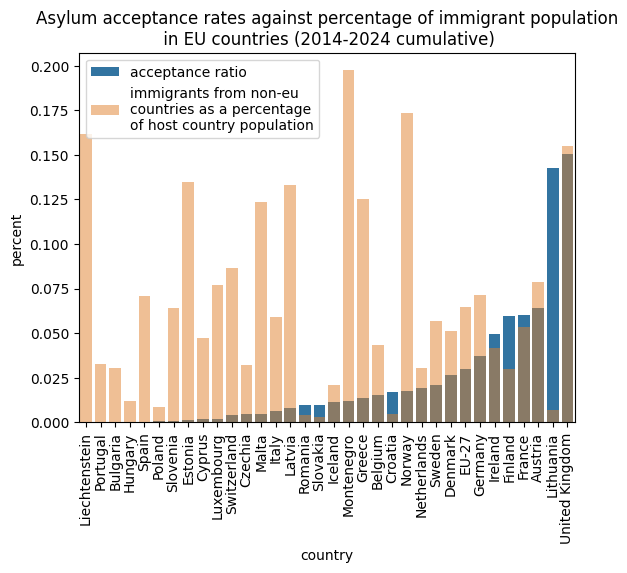

In [66]:
print(len(top))
top['OEUI_percentage'] = top['outside_EU_immigrants'] / top['population']
top.sort_values(by = 'a_ratio', inplace = True)

# just copying the previous bar plot:
a = sns.barplot(data = top, x = 'country', y = 'a_ratio', label = 'acceptance ratio')
a.set_ylabel('percent')
a.set_title('Asylum acceptance rates against percentage of immigrant population\n in EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)

# adding a new feature:
a = sns.barplot(data = top, x = 'country', y = 'OEUI_percentage',
                label = 'immigrants from non-eu\ncountries as a percentage\nof host country population',
                alpha = 0.5)

plt.xticks(rotation = 90)
pass

In [67]:
# import Pearson correlation coefficient:
from numpy import corrcoef
print("The correlation between the two variables is almost zero:", corrcoef(top['OEUI_percentage'], top['a_ratio']))

The correlation between the two variables is almost zero: [[1.         0.02216971]
 [0.02216971 1.        ]]


...Hypothesis proved false, there is no corellation between the proportion of immigrants in a country and its asylum acceptance rate...






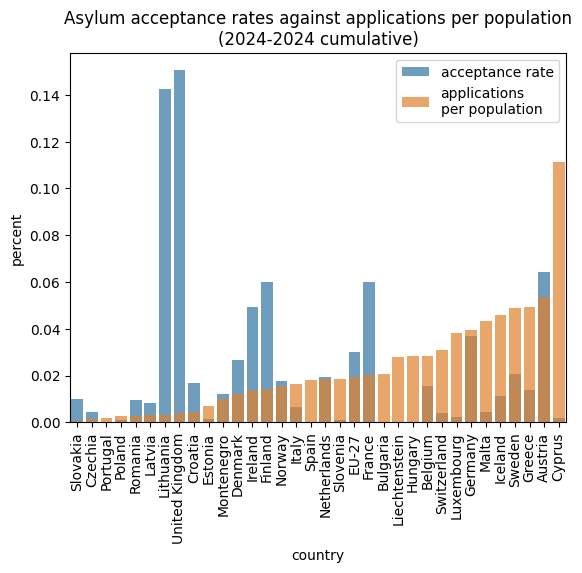

In [68]:
# Let's join the second and third plot and see what we get:

# first: asylum acceptance: 
top.sort_values(by = 'app_ratio', inplace = True)
t = sns.barplot(data = top, x = 'country', y = 'a_ratio', label = 'acceptance rate', alpha = 0.7)
t.set_title('Asylum acceptance rates against applications per population\n(2024-2024 cumulative)')
plt.xticks(rotation = 90)

# second: applications per population:
t = sns.barplot(data = top, x = 'country', y = 'app_ratio', label = 'applications\nper population', alpha = 0.7)
t.set_ylabel('percent')
plt.xticks(rotation = 90)
p.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [69]:
print("Correlation:", corrcoef(top['app_ratio'], top['a_ratio']))

Correlation: [[ 1.         -0.16401234]
 [-0.16401234  1.        ]]


We see a slight negative correlation: that means, the lesser the "burden", i.e. applications per population of the host country, the higher the acceptance rate. However, this trend is pretty weak. It would probably be more visible in case of an increased inflow of immigrants.

The acceptance rates depend mainly on many other factors, such as "differences in asylum laws and policies, political climate and public opinion"...

In [70]:
# GDP per capita in Purchasing Power Standards (PPS):
gdp = pd.read_csv("../Data/economy/GDP_per_capita_in_PPS.csv")
gdp.drop(columns = ['DATAFLOW', 'LAST UPDATE', 'freq', 'na_item', 'ppp_cat', 'OBS_FLAG', 'CONF_STATUS'], inplace = True)

# display(gdp)      # the year 2020 is pretty average, so I choose it as representative
gdp_2020 = gdp.query('TIME_PERIOD == 2020').drop(columns=['TIME_PERIOD'])
gdp_2020.rename(columns = {'geo':'country', 'OBS_VALUE':'gdp_PPS'}, inplace=True)
gdp_2020.set_index('country')
# display(gdp_2020)
top = top.merge(gdp_2020, on = 'country', how = 'left')
top.set_index('country', inplace = True)
top.at['Liechtenstein', 'gdp_PPS'] = 186 / 64 * 100
display(top)

,2020,count_applied,count_accepted,a_ratio,population,app_ratio,acc_ratio,outside_EU_immigrants,OEUI_percentage,gdp_PPS
country,,,,,,,,,,
Slovakia,17132.0,3565,35,0.009818,5457873,0.000653,0.000006,17132.0,0.003139,74.000
Czechia,341646.0,16890,75,0.004440,10693939,0.001579,0.000007,341646.0,0.031948,96.000
Portugal,341077.0,18155,0,0.000000,10375395,0.001750,0.000000,341077.0,0.032874,75.000
Poland,321042.0,107620,85,0.000790,37958138,0.002835,0.000002,321042.0,0.008458,79.000
Romania,75911.0,56310,550,0.009767,19328838,0.002913,0.000028,75911.0,0.003927,72.000
Latvia,253658.0,6140,50,0.008143,1907675,0.003219,0.000026,253658.0,0.132967,69.000
Lithuania,18719.0,9395,1340,0.142629,2809977,0.003343,0.000477,18719.0,0.006662,87.000
United Kingdom,10388000.0,262940,39570,0.150491,67025542,0.003923,0.000590,10388000.0,0.154986,101.000
Croatia,17565.0,16890,285,0.016874,3933511,0.004294,0.000072,17565.0,0.004465,66.000


Now let's find if there's any corellation between the gdp_PPS (a basic measure of wealth of a country) and:

* the asyllum acceptance rate
* how many people apply for asyllum in a country


[[nan nan]
 [nan  1.]]


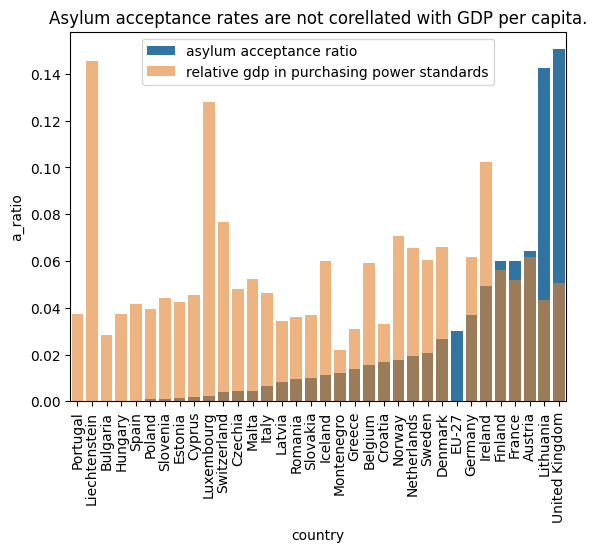

In [71]:
top.sort_values(by = 'a_ratio', inplace = True)
gdp_against_acceptance_rate = sns.barplot(data = top, x = 'country', y = 'a_ratio',
                     label = 'asylum acceptance ratio')
relative_gdp = top['gdp_PPS'] / 2000        # scaling down for better visibility
gdp_against_acceptance_rate = sns.barplot(data = top, x = 'country', y = relative_gdp, 
                            label = 'relative gdp in purchasing power standards',
                            alpha = 0.6 )
gdp_against_acceptance_rate.set_title('Asylum acceptance rates are not corellated with GDP per capita.')
plt.xticks(rotation = 90)
pass
print(corrcoef(top['gdp_PPS'], top['a_ratio']))

[[ 1. nan]
 [nan nan]]


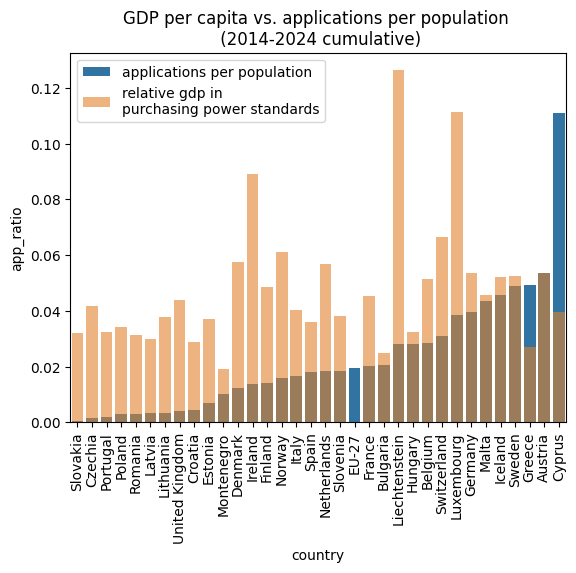

In [72]:
# Here: richer countries should be more attractive to asylum applicants

top.sort_values(by = 'app_ratio', inplace = True)
gdp_against_demand = sns.barplot(data = top, x = 'country', y = 'app_ratio',
                     label = 'applications per population')
relative_gdp = top['gdp_PPS'] / 2300
gdp_against_demand = sns.barplot(data = top, x = 'country', y = relative_gdp, 
                            label = 'relative gdp in \npurchasing power standards',
                            alpha = 0.6 )
gdp_against_demand.set_title('GDP per capita vs. applications per population \n (2014-2024 cumulative)')
plt.xticks(rotation = 90)
pass
print(corrcoef(top['app_ratio'], top['gdp_PPS']))

A small correlation (0.19) is present. However, this thrend should be stronger with regular migrants. Perhaps asylum applicants don't care as much which country they end up in as long as they evade the danger/persecution in their homeland.

In [73]:



# ================   n e w    s e c t i o n   ==================



Residence permits

Info k datam:

"Residence permit means any authorisation valid for at least 3 months issued by the authorities of a Member State allowing a third country national to stay legally on its territory. All valid permits on 31st December (end of the year). This data include statistics on all valid permits at the end of reference period, therefore including first permits, change of status or reasons to stay and renewed permits."

In [74]:
permits = pd.read_csv("../Data/Immigration/permits.csv")
permits.drop(columns = ['DATAFLOW', 'LAST UPDATE', 'freq', 'duration', 'unit', 'OBS_FLAG', 'CONF_STATUS', 'citizen' ], inplace = True)
permits.rename(columns = {'OBS_VALUE':'count', 'TIME_PERIOD':'year'}, inplace = True)
countries = set(permits['geo'])
permits = permits.pivot_table(index=["geo", "year"],
                         columns="reason",
                         values="count")
# data for remunerated activities is missing, but I will compute it from the others and total:
permits['Work reasons'] = permits['Total'] - permits['Education reasons'] - permits['Family reasons'] - permits['Other reason']
display(permits)

reason               Education reasons  Family reasons  Other reason  \
geo            year                                                    
Austria        2012            16955.0         75054.0      395161.0   
               2013            17960.0         77124.0      348981.0   
               2014            19538.0         72018.0      329813.0   
               2015            22474.0         76301.0      347497.0   
               2016            22497.0         80833.0      360987.0   
...                                ...             ...           ...   
United Kingdom 2014           513294.0        503225.0      121073.0   
               2015           517061.0        518268.0      135773.0   
               2016           507110.0        519618.0      107824.0   
               2017           523766.0        545778.0      102017.0   
               2018           467977.0        616125.0      110829.0   

reason                   Total  Work reasons  
geo            year                           
Austria        2012   493171.0        6001.0  
               2013   450410.0        6345.0  
               2014   427923.0        6554.0  
               2015   453069.0        6797.0  
               2016   471054.0        6737.0  
...                        ...           ...  
United Kingdom 2014  1509007.0      371415.0  
               2015  1544879.0      373777.0  
               2016  1504018.0      369466.0  
               2017  1533551.0      361990.0  
               2018  1577559.0      382628.0  

[371 rows x 5 columns]

In [75]:
# there is a problem with the eu sum - wrong by 2 magnitudes...
# # I have to fill in the data for EU because they are missing
# # with the help of chat gpt:

# # Step 1: Select only real countries (exclude existing EU27 row if needed)
# # Suppose missing years are NaN and you want to exclude incomplete EU rows
# # (Optional if you trust your data)
# countries_only = permits.drop('EU-27', errors='ignore', level='geo')

# # Step 2: Group by year and sum across countries
# eu_totals = countries_only.groupby('year').sum()

# # Step 3: Add a new index level with 'EU27_2020' (or your chosen name)
# eu_totals['geo'] = 'EU27_2020'  # Temporary column
# eu_totals = eu_totals.set_index('geo', append=True)  # Add 'geo' as outer index
# eu_totals = eu_totals.reorder_levels(['geo', 'year'])  # Make sure index order matches original

# # Step 4: Append to your original dataframe
# permits = pd.concat([permits, eu_totals])
# display(permits)
# display(permits.query('geo == "EU27_2020"'))

<Axes: title={'center': 'Permits in Czechia by reason'}, xlabel='Year', ylabel='Count'>

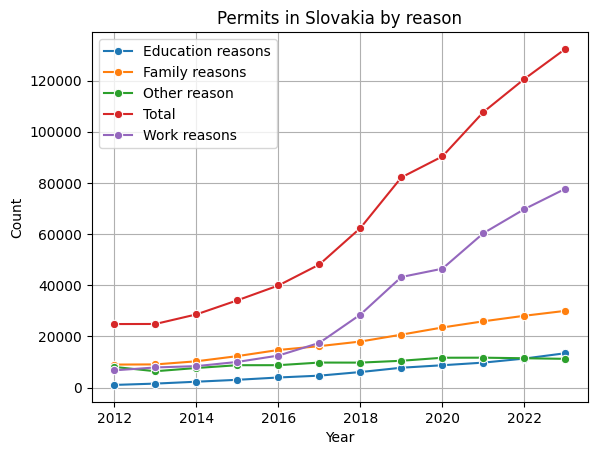

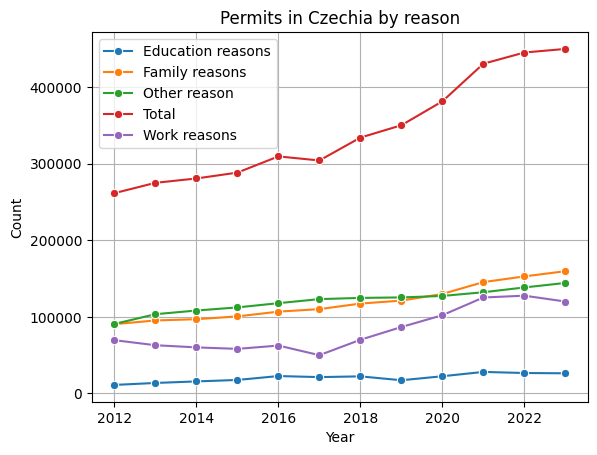

In [76]:
def draw_permits(country):
    # so that the permits are drawn each time into a new figure
    plt.figure()

    permits_in_country = permits.query('geo == @country')
    # display(permits_in_country)

    for column in permits_in_country.columns:
        if column not in ['year', 'geo']:  # Skip non-data columns
            plot = sns.lineplot(data = permits_in_country, x = 'year', y = column, label=column, marker='o')

    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title(f"Permits in {country} by reason")
    plt.legend()
    plt.grid(True)
    return plot

# draw_permits('EU27_2020)')    # can't
draw_permits('Slovakia')
draw_permits('Czechia')

In [77]:
# Let's find countries with the highest proportion of Residence Permits.
permits_in_2023 = permits.query("year == 2023").reset_index().rename(columns = {'geo':'country'})
#display(permits_in_2023)

popul_from_top = pd.Series(top['population'], index = top.index)
# display(popul_from_top)

# omg this is pure coding gold!!!
permits_with_pop = permits_in_2023.merge(popul_from_top, on = 'country', how = 'left')

# permits per population, here: ppp
permits_with_pop['ppp'] = permits_with_pop['Total'] / permits_with_pop['population']

display(permits_with_pop)

,country,year,Education reasons,Family reasons,Other reason,Total,Work reasons,population,ppp
0,Austria,2023,17669.0,96721.0,406185.0,535496.0,14921.0,8901064.0,0.060161
1,Belgium,2023,22336.0,295358.0,69819.0,517711.0,130198.0,11522440.0,0.044931
2,Bulgaria,2023,5067.0,33216.0,55651.0,109758.0,15824.0,6569275.0,0.016708
3,Croatia,2023,568.0,11268.0,12965.0,112428.0,87627.0,3933511.0,0.028582
4,Cyprus,2023,5116.0,26770.0,39850.0,132735.0,60999.0,888005.0,0.149476
5,Czechia,2023,26200.0,159608.0,144244.0,450024.0,119972.0,10693939.0,0.042082
6,Denmark,2023,13292.0,110439.0,164622.0,353886.0,65533.0,5822763.0,0.060776
7,Estonia,2023,1494.0,14074.0,160703.0,192250.0,15979.0,1328976.0,0.144660
8,European Union - 27 countries (from 2020),2023,1088875.0,8503699.0,6613156.0,25224272.0,9018542.0,NaN,NaN
9,Finland,2023,20930.0,83918.0,39083.0,234076.0,90145.0,5525292.0,0.042364


In [78]:
permits_with_pop.sort_values(by = 'ppp', inplace = True, ascending=False)
highest = permits_with_pop[0:5]['country']
display(highest)
# for c in highest:
#     draw_permits(c)

21            Malta
18    Liechtenstein
4            Cyprus
7           Estonia
17           Latvia
Name: country, dtype: object

Now we would like to find out if there's a corellation between the economy of a country and the number of permits, and especially permits for work.

In [79]:
permits_with_pop = permits_with_pop.merge(top.loc[:, 'gdp_PPS'], on = 'country', how = 'left')

[[nan nan]
 [nan nan]]


<Axes: title={'center': 'Economy vs. total proportion of permits'}, xlabel='country', ylabel='ppp'>

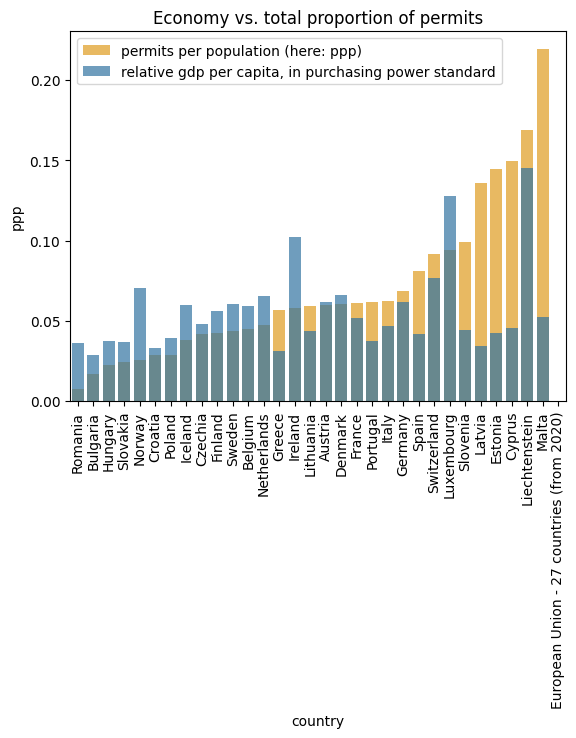

In [80]:
def draw_econ_vs_permits(dataset, category, label, title):
    dataset.sort_values(category, inplace = True)
    econ_vs_permits = sns.barplot(data = dataset, x = 'country', y = category,
                    label = label, color = 'orange', alpha = 0.7)
    econ_vs_permits = sns.barplot(data = dataset, x = 'country', y = dataset['gdp_PPS']/2000 ,
                                label = 'relative gdp per capita, in purchasing power standard', alpha =0.7)
    econ_vs_permits.set_title(title)
    plt.xticks(rotation = 90)
    print(corrcoef(dataset[category], dataset['gdp_PPS']))
    return econ_vs_permits

draw_econ_vs_permits(dataset=permits_with_pop, category='ppp', label = 'permits per population (here: ppp)',
                     title = 'Economy vs. total proportion of permits')

We may note that the 7 countries on the right side of the plot are pretty small countries, and they seem to stand out from the others quite a lot, although they constitute only a very small part of the EU (their population in total is roughly 10 milion). Let's see what we get without these outliers: 

[[1.         0.55009594]
 [0.55009594 1.        ]]


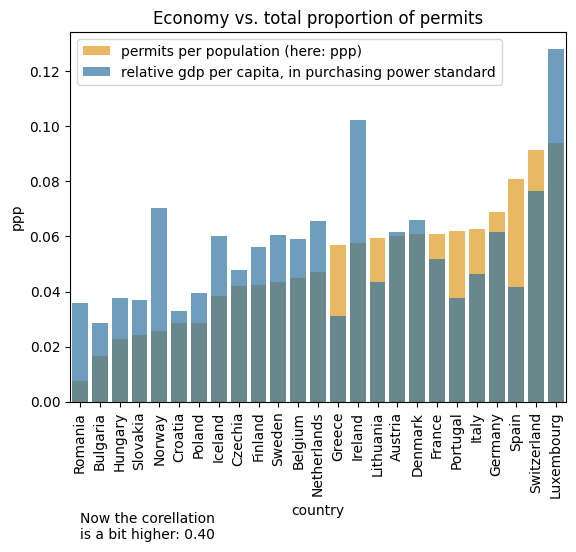

In [81]:
permits_with_pop['work_prop'] = permits_with_pop['Work reasons'] / permits_with_pop['Total'] 
permits_with_pop['edu_prop'] = permits_with_pop['Education reasons'] / permits_with_pop['Total'] 
permits_with_pop['other_prop'] = permits_with_pop['Other reason'] / permits_with_pop['Total']
permits_with_pop['family_prop'] = permits_with_pop['Family reasons'] / permits_with_pop['Total']

permits_with_pop_cropped = permits_with_pop.sort_values(by = 'ppp', ascending=True)[: -7]
# display(permits_with_pop_cropped)     # alright

# now plotting again:
q = draw_econ_vs_permits(dataset = permits_with_pop_cropped,  category='ppp', 
                    label = 'permits per population (here: ppp)',
                     title = 'Economy vs. total proportion of permits')
q.text(x = 0, y= -0.05, s = 'Now the corellation \nis a bit higher: 0.40')
pass

[[ 1.         -0.27955171]
 [-0.27955171  1.        ]]


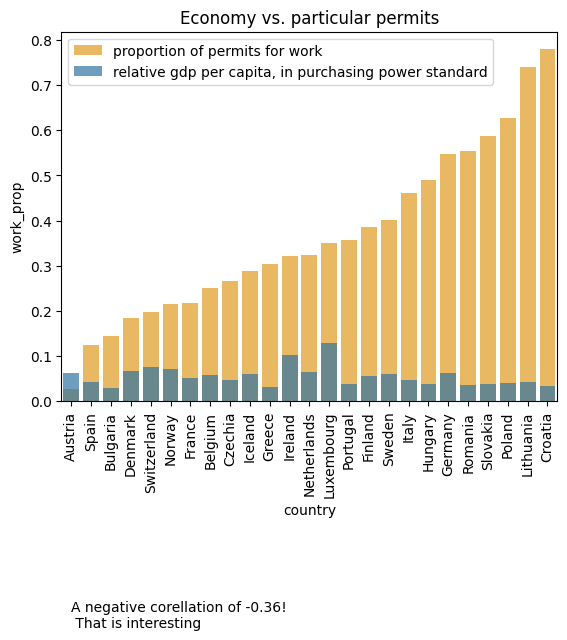

In [82]:
o = draw_econ_vs_permits(dataset = permits_with_pop_cropped, category = 'work_prop',
        label = 'proportion of permits for work', title = 'Economy vs. particular permits')
o.text(x = 0, y = - 0.5, s = 'A negative corellation of -0.36! \n That is interesting')
pass

In [83]:
# p = draw_econ_vs_permits(dataset = permits_with_pop_cropped, category = 'other_prop', label = 'proportion of permits for other reasons', title = 'Economy vs. particular permits')

[[1.        0.1608856]
 [0.1608856 1.       ]]


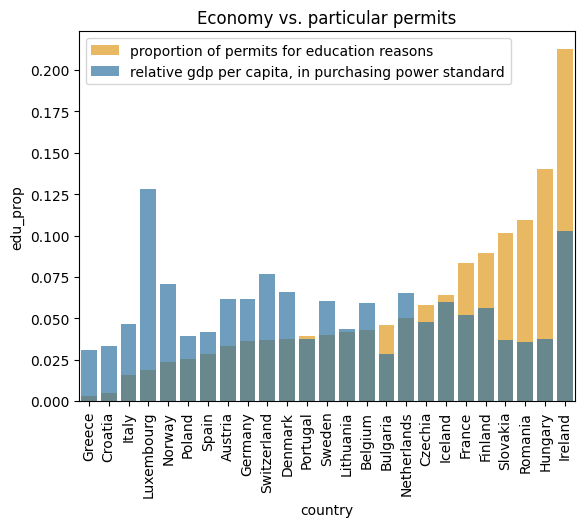

In [84]:
t = draw_econ_vs_permits(dataset = permits_with_pop_cropped, category = 'edu_prop', label = 'proportion of permits for education reasons', title = 'Economy vs. particular permits')

One would think that more developed countries are wealthier, which goes hand in hand with good education. Therefore a wealthy country may have an increased concentration of foreign students.

Although the calculated Pearson cor. coeficient is 0.36, I can't see any prevailing trend in the plot, contrary to all reason. 

In [85]:
# f = draw_econ_vs_permits(dataset = permits_with_pop_cropped, category = 'family_prop', label = 'proportion of permits for family reasons', title = 'Economy vs. particular permits')

In [86]:
# Totals:
columns = ['Education reasons', 'Family reasons', 'Other reason', 'Work reasons']	
totals = {col:permits_with_pop[col].sum() for col in columns}
for key, value in totals.items():
    print(key,':' + (18-len(key))*' '+ str(round(value/permits_with_pop['Total'].sum()*100,1)) + ' %')

Education reasons : 4.3 %
Family reasons :    33.5 %
Other reason :      26.7 %
Work reasons :      35.5 %
